In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [19]:
data_0 = pd.read_csv('delhi_dataset.csv')

In [20]:
data = data_0.drop(['Date', 'Name_of_state', 'Latitude', 'Longitude', 'Population'], axis = 1)
data.head()

,Total_Confirmed_cases_till_date,Death_till_date,Recovered_till_date,Max_Temperature_in_Degrees,Min_Temperature_in_Degrees,Total_Test_till_date,Mortality_Rate_in_percent,Case_Fatality_Rate_in_percent
0,1510,28,30,41,24,16282,0.000141,0.019
1,1561,30,30,41,25,16605,0.000151,0.019
2,1578,32,42,41,23,18784,0.000162,0.020
3,1640,38,51,39,25,21409,0.000192,0.023
4,1707,42,72,38,23,22283,0.000212,0.025


In [21]:
data.tail()

,Total_Confirmed_cases_till_date,Death_till_date,Recovered_till_date,Max_Temperature_in_Degrees,Min_Temperature_in_Degrees,Total_Test_till_date,Mortality_Rate_in_percent,Case_Fatality_Rate_in_percent
49,20834,523,8746,38,24,223607,0.002640,0.025
50,22132,556,9243,39,24,230145,0.002806,0.025
51,23645,606,9542,37,25,236506,0.003058,0.026
52,25004,650,9898,36,23,241693,0.003281,0.026
53,26334,708,10315,38,23,246873,0.003573,0.027


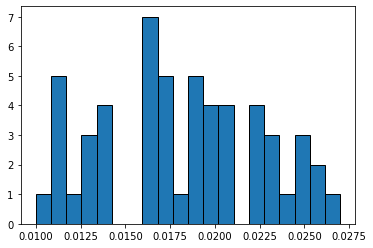

In [22]:
plt.hist(data['Case_Fatality_Rate_in_percent'], ec = 'black', bins = 20)
plt.show()
    

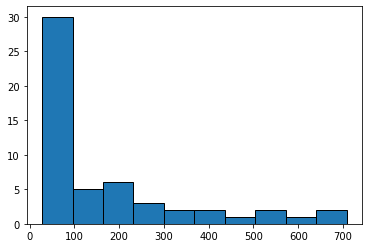

In [23]:
plt.hist(data['Death_till_date'], ec = 'black')
plt.show()
                    

In [24]:
data.corr()

,Total_Confirmed_cases_till_date,Death_till_date,Recovered_till_date,Max_Temperature_in_Degrees,Min_Temperature_in_Degrees,Total_Test_till_date,Mortality_Rate_in_percent,Case_Fatality_Rate_in_percent
Total_Confirmed_cases_till_date,1.000000,0.971217,0.988029,0.157065,0.256578,0.976409,0.971212,0.399189
Death_till_date,0.971217,1.000000,0.945036,0.030343,0.177343,0.900271,1.000000,0.573835
Recovered_till_date,0.988029,0.945036,1.000000,0.244543,0.311995,0.985307,0.945043,0.397631
Max_Temperature_in_Degrees,0.157065,0.030343,0.244543,1.000000,0.744972,0.271502,0.030322,-0.217987
Min_Temperature_in_Degrees,0.256578,0.177343,0.311995,0.744972,1.000000,0.319554,0.177342,-0.073384
Total_Test_till_date,0.976409,0.900271,0.985307,0.271502,0.319554,1.000000,0.900270,0.257034
Mortality_Rate_in_percent,0.971212,1.000000,0.945043,0.030322,0.177342,0.900270,1.000000,0.573865
Case_Fatality_Rate_in_percent,0.399189,0.573835,0.397631,-0.217987,-0.073384,0.257034,0.573865,1.000000


In [25]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

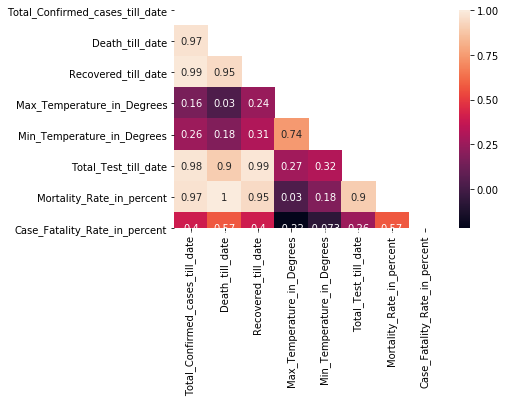

In [26]:
#plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), mask=mask, annot=True)
#plt.xticks(fontsize= 14)
#plt.yticks(fontsize= 14)
plt.show()

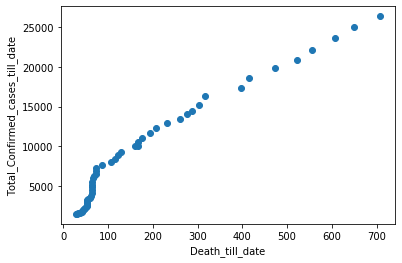

In [27]:
plt.scatter(data['Death_till_date'], data['Total_Confirmed_cases_till_date'])
plt.xlabel('Death_till_date')
plt.ylabel('Total_Confirmed_cases_till_date')
plt.show()

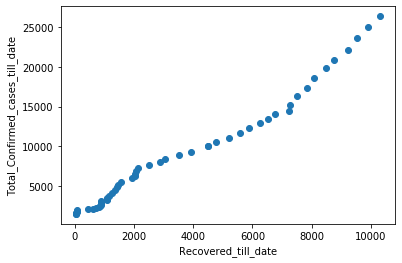

In [28]:
plt.scatter(data['Recovered_till_date'], data['Total_Confirmed_cases_till_date'])
plt.xlabel('Recovered_till_date')
plt.ylabel('Total_Confirmed_cases_till_date')
plt.show()

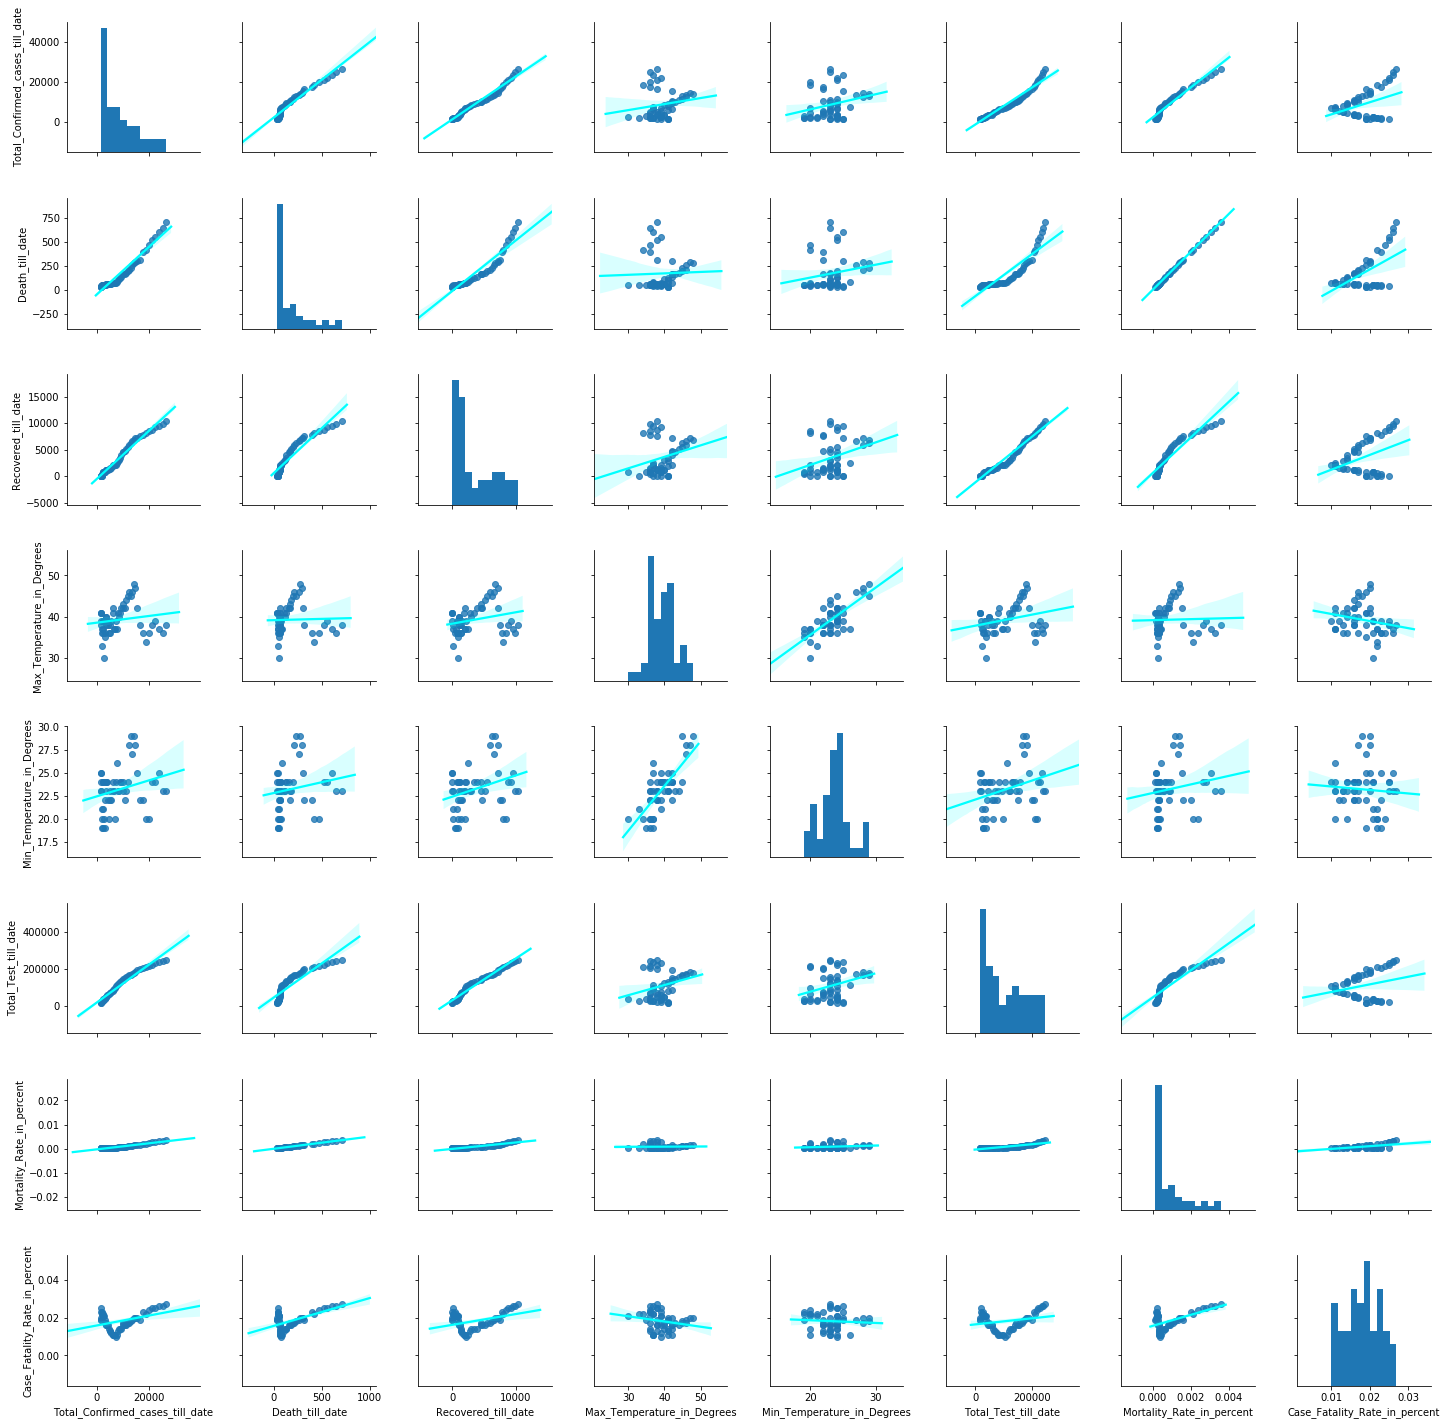

Wall time: 26.2 s


In [29]:
%%time

sns.pairplot(data, kind = 'reg', plot_kws= {'line_kws':{'color': 'cyan'}})
plt.show()

In [30]:
target= data['Total_Confirmed_cases_till_date']
features= data.drop('Total_Confirmed_cases_till_date', axis= 1)

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size= 0.2, random_state= 10)

In [31]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('intercept', regr.intercept_)
print('Training data r-squared:', regr.score(X_train, y_train))
print('Testing data r-squared:', regr.score(X_test, y_test))

pd.DataFrame({'features_names':X_train.columns,'coef':regr.coef_})

intercept 1446.2500881061696
Training data r-squared: 0.9995066503652483
Testing data r-squared: 0.9972283316391064


,features_names,coef
0,Death_till_date,1.039206e+03
1,Recovered_till_date,-6.193425e-02
2,Max_Temperature_in_Degrees,1.390117e+01
3,Min_Temperature_in_Degrees,-1.308777e+01
4,Total_Test_till_date,4.452879e-02
5,Mortality_Rate_in_percent,-2.012443e+08
6,Case_Fatality_Rate_in_percent,-8.858796e+04


In [32]:
y_train.skew()
# np.log(data['Recovered_till_date'].skew())

0.8978450220001138

In [33]:
log_y_train = np.log(y_train)
log_y_train.skew()

-0.011727265768423145

In [34]:
target= np.log(data['Total_Confirmed_cases_till_date'])
features = data.drop(['Total_Confirmed_cases_till_date'], axis= 1)

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size= 0.2, random_state= 10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('intercept', regr.intercept_)
print('Training data r-squared:', regr.score(X_train, y_train))
print('Testing data r-squared:', regr.score(X_test, y_test))

pd.DataFrame({'features_names':X_train.columns,'coef':regr.coef_})


intercept 8.847825585807355
Training data r-squared: 0.9936654139967378
Testing data r-squared: 0.9847821885696999


,features_names,coef
0,Death_till_date,-0.047097
1,Recovered_till_date,0.000124
2,Max_Temperature_in_Degrees,-0.010990
3,Min_Temperature_in_Degrees,-0.005053
4,Total_Test_till_date,0.000008
5,Mortality_Rate_in_percent,9276.602223
6,Case_Fatality_Rate_in_percent,-44.665615


In [35]:
target= np.log(data['Total_Confirmed_cases_till_date'])
features = data.drop(['Total_Confirmed_cases_till_date', 'Recovered_till_date'], axis= 1)
features['log_Recovered_till_date'] = np.log(data['Recovered_till_date'])

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size= 0.2, random_state= 10)
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const )
results = model.fit()

# results.params
# results.pvalues
print(results.bic)
pd.DataFrame({'coef' : results.params, 'p-values' : round(results.pvalues, 3)} )

-124.98253149878622


C:\Users\samee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,coef,p-values
const,7.544276,0.000
Death_till_date,-0.054745,0.626
Max_Temperature_in_Degrees,-0.001334,0.682
Min_Temperature_in_Degrees,-0.001449,0.745
Total_Test_till_date,0.000010,0.000
Mortality_Rate_in_percent,10923.388247,0.624
Case_Fatality_Rate_in_percent,-28.742985,0.000
log_Recovered_till_date,0.093079,0.000


In [36]:
target= np.log(data['Total_Confirmed_cases_till_date'])
features = data.drop('Total_Confirmed_cases_till_date', axis= 1)

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size= 0.2, random_state= 10)
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const )
results = model.fit()

# results.params
# results.pvalues
print(results.bic)
pd.DataFrame({'coef' : results.params, 'p-values' : round(results.pvalues, 3)} )

-73.9782285746208


,coef,p-values
const,8.847826,0.000
Death_till_date,-0.047097,0.820
Recovered_till_date,0.000124,0.046
Max_Temperature_in_Degrees,-0.010990,0.091
Min_Temperature_in_Degrees,-0.005053,0.532
Total_Test_till_date,0.000008,0.001
Mortality_Rate_in_percent,9276.602223,0.821
Case_Fatality_Rate_in_percent,-44.665615,0.000


In [63]:
target= np.log(data['Total_Confirmed_cases_till_date'])
features = data.drop(['Total_Confirmed_cases_till_date', 'Recovered_till_date','Mortality_Rate_in_percent',
                      'Min_Temperature_in_Degrees', 'Max_Temperature_in_Degrees', 'Death_till_date'], axis= 1)
features['log_Recovered_till_date'] = np.log(data['Recovered_till_date'])
features['log_death_till_date'] = np.log(data['Death_till_date'])


X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size= 0.2, random_state= 10)
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const )
results = model.fit()

# results.params
# results.pvalues
print(results.bic)
print(results.rsquared)
pd.DataFrame({'coef' : results.params, 'p-values' : round(results.pvalues, 3)} )



-145.90764110578098
0.998454021975379


,coef,p-values
const,5.945841,0.000
Total_Test_till_date,0.000004,0.005
Case_Fatality_Rate_in_percent,-45.106050,0.000
log_Recovered_till_date,0.031780,0.043
log_death_till_date,0.625524,0.000


In [52]:
target= np.log(data['Total_Confirmed_cases_till_date'])
features = data.drop(['Total_Confirmed_cases_till_date', 'Recovered_till_date',
                      'Mortality_Rate_in_percent', 'Min_Temperature_in_Degrees', 'Max_Temperature_in_Degrees', 'Death_till_date'], axis= 1)
features['log_Recovered_till_date'] = np.log(data['Recovered_till_date'])
features['log_death_till_date'] = np.log(data['Death_till_date'])

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size= 0.2, random_state= 10)

vif = []
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog= X_incl_const.values, exog_idx= i))
print(vif)

pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': vif })

[2672.6328393472013, 314.07295389521556, 16.04562344508723, 19.116596826865464, 489.63880511471376]


,coef_name,vif
0,const,2672.632839
1,Total_Test_till_date,314.072954
2,Case_Fatality_Rate_in_percent,16.045623
3,log_Recovered_till_date,19.116597
4,log_death_till_date,489.638805


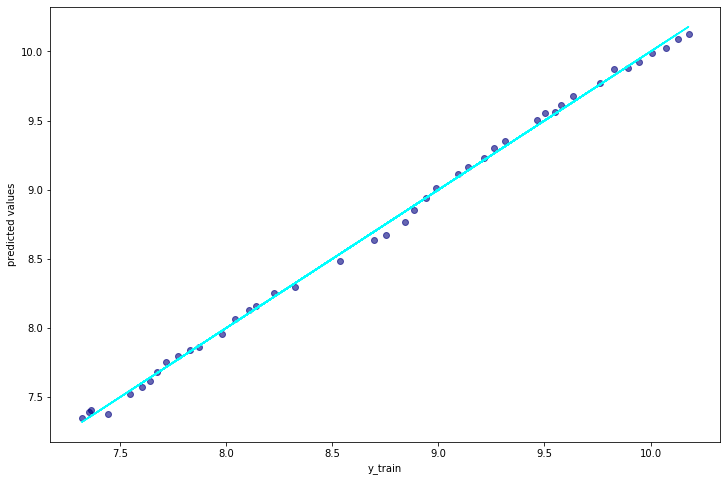

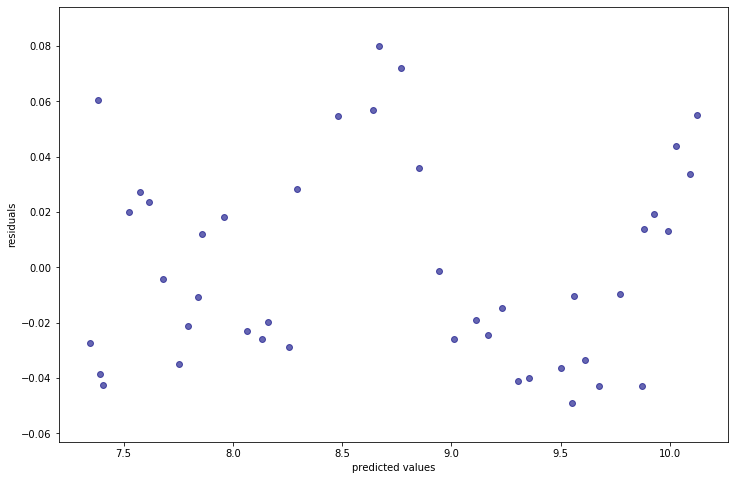

In [57]:
target= np.log(data['Total_Confirmed_cases_till_date'])
features = data.drop(['Total_Confirmed_cases_till_date', 'Recovered_till_date','Mortality_Rate_in_percent',
                      'Min_Temperature_in_Degrees', 'Max_Temperature_in_Degrees', 'Death_till_date'], axis= 1)
features['log_Recovered_till_date'] = np.log(data['Recovered_till_date'])
features['log_death_till_date'] = np.log(data['Death_till_date'])

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size= 0.2, random_state= 10)
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const )
results = model.fit()


corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(12,8))
plt.scatter(y_train, results.fittedvalues, c= 'navy', alpha= 0.6)
plt.xlabel('y_train')
plt.ylabel('predicted values')
plt.plot(y_train, y_train, c = 'cyan')
plt.show()

corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(12,8))
plt.scatter( results.fittedvalues, results.resid, c= 'navy', alpha= 0.6)
plt.ylabel('residuals')
plt.xlabel('predicted values')

plt.show()

In [61]:
mse = results.mse_resid
rmse = np.sqrt(mse)
print('mse is :', mse)
print('rmse is :', rmse)

mse is : 0.0014375529990722203
rmse is : 0.037915076144882265
